In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Mengatur tampilan plot agar lebih rapi (opsional)
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid') # Menggunakan style seaborn terbaru
sns.set_palette('viridis') # Mengatur palet warna default seaborn

In [4]:
import pandas as pd
import numpy as np

# Path absolut ke file dataset
file_path = r'D:\Project Data Cleaning & EDA\data\online_retail_II.xlsx'

try:
    df = pd.read_excel(file_path)
    print("✅ Dataset berhasil dimuat dari Excel!")
    print("\n📌 Lima baris pertama dataset:")
    print(df.head())
    print("\n📊 Informasi ringkas dataset:")
    df.info()
except FileNotFoundError:
    print(f"❌ Error: File '{file_path}' tidak ditemukan. Periksa kembali nama dan path file-nya.")
    print("🔧 Membuat contoh DataFrame untuk demonstrasi...")

    # Contoh DataFrame jika file tidak ditemukan
    data = {
        'ID': range(1, 11),
        'Usia': [25, 30, 35, 28, 40, 22, 32, 80, 38, 45],  # 80 sebagai outlier
        'Pendapatan': [50000, 60000, np.nan, 55000, 90000, 45000, 70000, 62000, 80000, 95000],
        'Pengeluaran': [30000, 35000, 40000, 32000, 50000, 150000, 38000, 33000, 42000, 55000],  # 150000 outlier
        'Jenis Kelamin': ['Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita'],
        'Pendidikan': [np.nan, 'Master', 'Sarjana', 'SMA', 'Doktor', 'Sarjana', 'Master', 'SMA', 'Sarjana', 'Doktor'],
        'Tingkat Kepuasan': [4, 5, 4, 3, 5, 4, 5, 3, 4, 10],  # 10 sebagai outlier
        'Tanggal Bergabung': pd.to_datetime(['2020-01-15', '2019-03-20', '2021-07-10', '2018-11-05', '2022-02-28',
                                              '2019-09-12', '2020-05-01', '2017-06-25', '2021-01-30', '2022-08-18']),
        'Komentar': ['Baik', 'Sangat Baik', np.nan, 'Cukup', 'Luar Biasa', 'Baik', 'Sangat Baik', np.nan, 'Cukup', 'Luar Biasa']
    }

    df = pd.DataFrame(data)
    print("\n🧪 Contoh DataFrame berhasil dibuat dengan missing values dan outliers:")
    print(df.head(10))
    df.info()

✅ Dataset berhasil dimuat dari Excel!

📌 Lima baris pertama dataset:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  

📊 Informasi ringkas dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Colum


Jumlah missing values per kolom:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


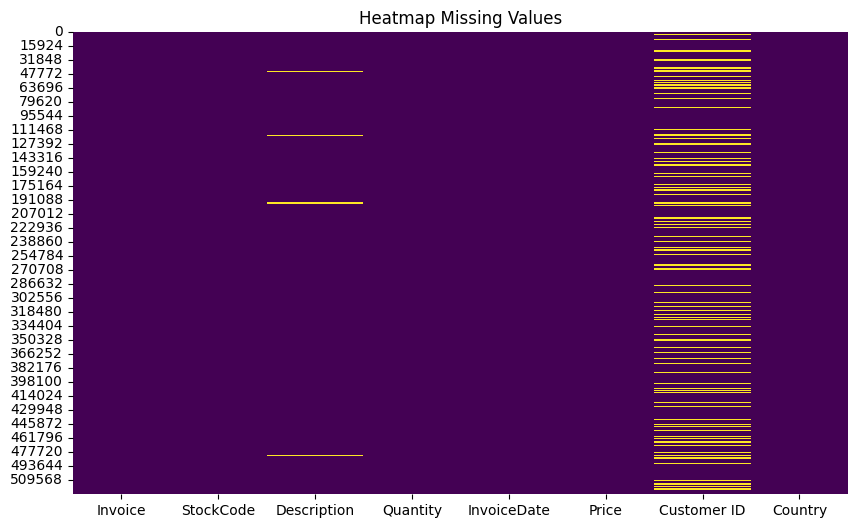

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Buat DataFrame contoh (bukan dari file Excel)
data = {
    'ID': range(1, 11),
    'Usia': [25, 30, 35, 28, 40, 22, 32, 80, 38, 45],
    'Pendapatan': [50000, 60000, np.nan, 55000, 90000, 45000, 70000, 62000, 80000, 95000],
    'Pengeluaran': [30000, 35000, 40000, 32000, 50000, 150000, 38000, 33000, 42000, 55000],
    'Jenis Kelamin': ['Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita'],
    'Pendidikan': [np.nan, 'Master', 'Sarjana', 'SMA', 'Doktor', 'Sarjana', 'Master', 'SMA', 'Sarjana', 'Doktor'],
    'Tingkat Kepuasan': [4, 5, 4, 3, 5, 4, 5, 3, 4, 10],
    'Tanggal Bergabung': pd.to_datetime(['2020-01-15', '2019-03-20', '2021-07-10', '2018-11-05', '2022-02-28',
                                          '2019-09-12', '2020-05-01', '2017-06-25', '2021-01-30', '2022-08-18']),
    'Komentar': ['Baik', 'Sangat Baik', np.nan, 'Cukup', 'Luar Biasa', 'Baik', 'Sangat Baik', np.nan, 'Cukup', 'Luar Biasa']
}

df = pd.DataFrame(data)

# Imputasi dengan Median untuk kolom 'Pendapatan' (lebih robust terhadap outlier)
median_pendapatan = df['Pendapatan'].median()
df['Pendapatan'] = df['Pendapatan'].fillna(median_pendapatan)
print(f"\n✅ Missing values di 'Pendapatan' diisi dengan median: {median_pendapatan}")

# Imputasi dengan Mode untuk kolom 'Pendidikan'
mode_pendidikan = df['Pendidikan'].mode()[0]
df['Pendidikan'] = df['Pendidikan'].fillna(mode_pendidikan)
print(f"✅ Missing values di 'Pendidikan' diisi dengan mode: {mode_pendidikan}")

# Imputasi dengan nilai 'Tidak Ada Komentar' untuk kolom 'Komentar'
df['Komentar'] = df['Komentar'].fillna('Tidak Ada Komentar')
print("✅ Missing values di 'Komentar' diisi dengan 'Tidak Ada Komentar'")

# Cek kembali jumlah missing values setelah proses imputasi
print("\n📉 Jumlah missing values setelah imputasi:")
print(df.isnull().sum())



✅ Missing values di 'Pendapatan' diisi dengan median: 62000.0
✅ Missing values di 'Pendidikan' diisi dengan mode: Sarjana
✅ Missing values di 'Komentar' diisi dengan 'Tidak Ada Komentar'

📉 Jumlah missing values setelah imputasi:
ID                   0
Usia                 0
Pendapatan           0
Pengeluaran          0
Jenis Kelamin        0
Pendidikan           0
Tingkat Kepuasan     0
Tanggal Bergabung    0
Komentar             0
dtype: int64


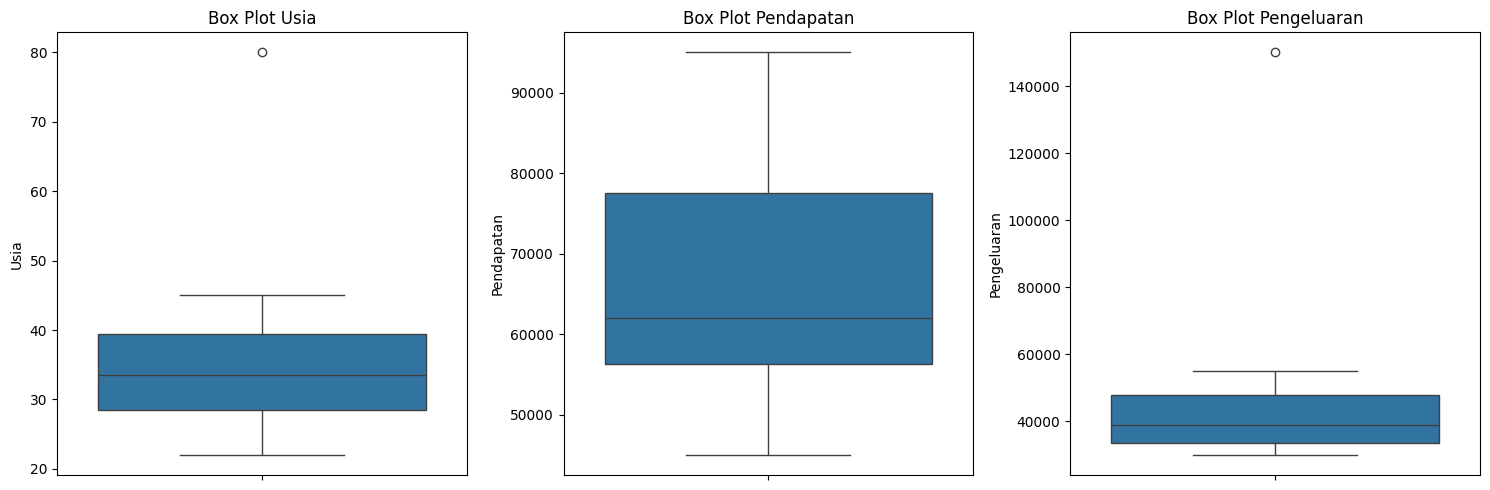

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Usia'])
plt.title('Box Plot Usia')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Pendapatan'])
plt.title('Box Plot Pendapatan')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Pengeluaran'])
plt.title('Box Plot Pengeluaran')

plt.tight_layout()
plt.show()


Outliers di 'Pengeluaran' telah dicapping.
Outliers di 'Usia' telah dicapping.
Outliers di 'Tingkat Kepuasan' telah dicapping (dibatasi hingga 5).


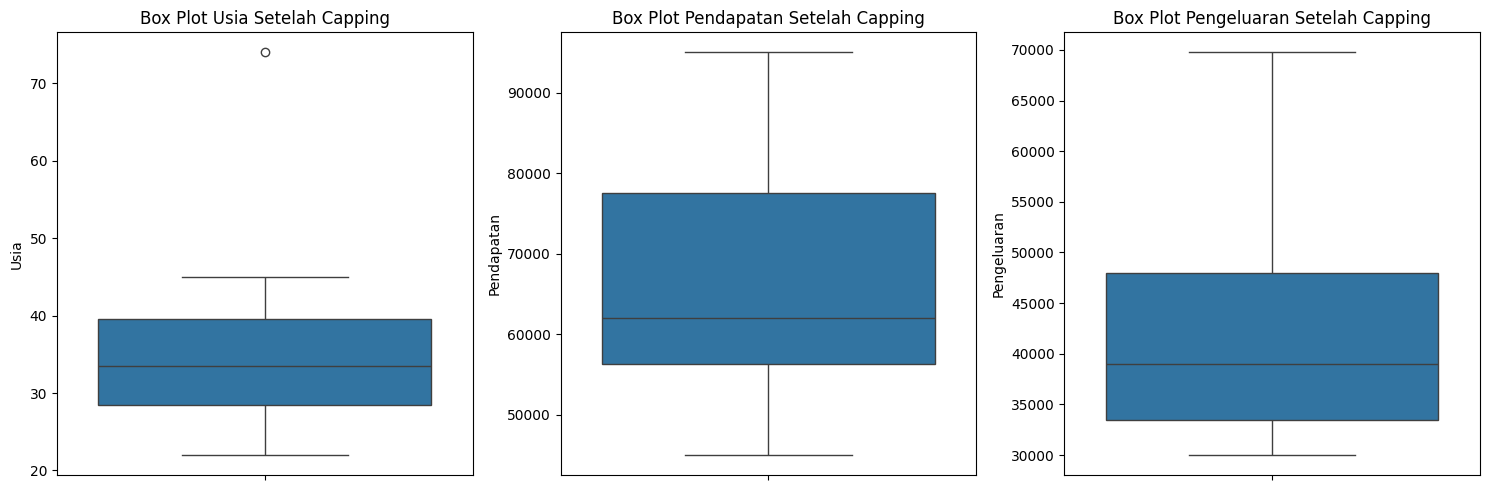

In [11]:
# Capping outliers untuk 'Pengeluaran' menggunakan batas IQR
Q1_pengeluaran = df['Pengeluaran'].quantile(0.25)
Q3_pengeluaran = df['Pengeluaran'].quantile(0.75)
IQR_pengeluaran = Q3_pengeluaran - Q1_pengeluaran
lower_bound_pengeluaran = Q1_pengeluaran - 1.5 * IQR_pengeluaran
upper_bound_pengeluaran = Q3_pengeluaran + 1.5 * IQR_pengeluaran

df['Pengeluaran'] = np.where(df['Pengeluaran'] > upper_bound_pengeluaran, upper_bound_pengeluaran, df['Pengeluaran'])
df['Pengeluaran'] = np.where(df['Pengeluaran'] < lower_bound_pengeluaran, lower_bound_pengeluaran, df['Pengeluaran'])
print("\nOutliers di 'Pengeluaran' telah dicapping.")

# Capping outliers untuk 'Usia' menggunakan persentil (misal, 99th percentile)
upper_bound_usia = df['Usia'].quantile(0.99)
df['Usia'] = np.where(df['Usia'] > upper_bound_usia, upper_bound_usia, df['Usia'])
print("Outliers di 'Usia' telah dicapping.")

# Capping untuk Tingkat Kepuasan (jika ada nilai > 5 yang merupakan kesalahan input)
df['Tingkat Kepuasan'] = np.where(df['Tingkat Kepuasan'] > 5, 5, df['Tingkat Kepuasan'])
print("Outliers di 'Tingkat Kepuasan' telah dicapping (dibatasi hingga 5).")

# Verifikasi setelah capping
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Usia'])
plt.title('Box Plot Usia Setelah Capping')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Pendapatan'])
plt.title('Box Plot Pendapatan Setelah Capping')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Pengeluaran'])
plt.title('Box Plot Pengeluaran Setelah Capping')

plt.tight_layout()
plt.show()


✅ Kolom 'Pendapatan' dan 'Pengeluaran' telah dinormalisasi (Min-Max Scaling).
✅ Kolom 'Usia' telah distandardisasi (Z-score Normalization).


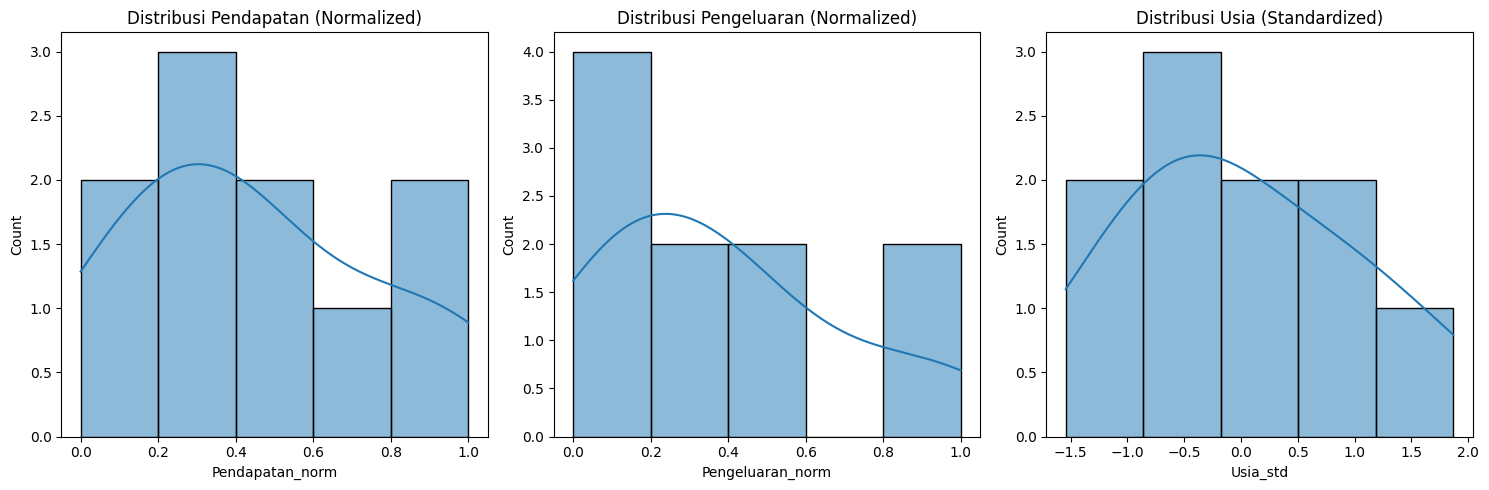

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh DataFrame dengan kolom 'Pendapatan', 'Pengeluaran', dan 'Usia'
data = {
    'Pendapatan': [50000, 60000, 65000, 55000, 90000, 45000, 70000, 62000, 80000, 95000],
    'Pengeluaran': [30000, 35000, 40000, 32000, 50000, 28000, 38000, 33000, 42000, 55000],
    'Usia': [25, 30, 35, 28, 40, 22, 32, 29, 38, 45]
}
df = pd.DataFrame(data)

# Normalisasi (Min-Max Scaling) untuk 'Pendapatan' dan 'Pengeluaran'
min_max_scaler = MinMaxScaler()
df[['Pendapatan_norm', 'Pengeluaran_norm']] = min_max_scaler.fit_transform(df[['Pendapatan', 'Pengeluaran']])
print("\n✅ Kolom 'Pendapatan' dan 'Pengeluaran' telah dinormalisasi (Min-Max Scaling).")

# Standardisasi (Z-score Normalization) untuk 'Usia'
std_scaler = StandardScaler()
df['Usia_std'] = std_scaler.fit_transform(df[['Usia']])
print("✅ Kolom 'Usia' telah distandardisasi (Z-score Normalization).")

# Visualisasi distribusi setelah scaling
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Pendapatan_norm'], kde=True)
plt.title('Distribusi Pendapatan (Normalized)')

plt.subplot(1, 3, 2)
sns.histplot(df['Pengeluaran_norm'], kde=True)
plt.title('Distribusi Pengeluaran (Normalized)')

plt.subplot(1, 3, 3)
sns.histplot(df['Usia_std'], kde=True)
plt.title('Distribusi Usia (Standardized)')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Data contoh dengan kolom 'Tanggal Bergabung'
data = {
    'Nama': ['A', 'B', 'C', 'D', 'E'],
    'Tanggal Bergabung': ['2021-01-10', '2020-05-20', '2019-08-15', '2022-02-01', '2023-03-12']
}
df = pd.DataFrame(data)

# Ubah ke datetime
df['Tanggal Bergabung'] = pd.to_datetime(df['Tanggal Bergabung'])
print(f"\nTipe data 'Tanggal Bergabung' setelah diubah: {df['Tanggal Bergabung'].dtype}")

# Ekstrak tahun dan bulan
df['Tahun Bergabung'] = df['Tanggal Bergabung'].dt.year
df['Bulan Bergabung'] = df['Tanggal Bergabung'].dt.month
print("Kolom 'Tahun Bergabung' dan 'Bulan Bergabung' ditambahkan.")
print(df[['Tanggal Bergabung', 'Tahun Bergabung', 'Bulan Bergabung']])


Tipe data 'Tanggal Bergabung' setelah diubah: datetime64[ns]
Kolom 'Tahun Bergabung' dan 'Bulan Bergabung' ditambahkan.
  Tanggal Bergabung  Tahun Bergabung  Bulan Bergabung
0        2021-01-10             2021                1
1        2020-05-20             2020                5
2        2019-08-15             2019                8
3        2022-02-01             2022                2
4        2023-03-12             2023                3


In [17]:
print(f"\nJumlah baris duplikat sebelum dihapus: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah baris duplikat setelah dihapus: {df.duplicated().sum()}")


Jumlah baris duplikat sebelum dihapus: 0
Jumlah baris duplikat setelah dihapus: 0


In [18]:
print("\nStatistik Deskriptif untuk kolom numerik:")
print(df.describe())

print("\nStatistik Deskriptif untuk kolom kategorikal:")
print(df.describe(include='object'))


Statistik Deskriptif untuk kolom numerik:
         Tanggal Bergabung  Tahun Bergabung  Bulan Bergabung
count                    5         5.000000         5.000000
mean   2021-04-05 19:12:00      2021.000000         3.800000
min    2019-08-15 00:00:00      2019.000000         1.000000
25%    2020-05-20 00:00:00      2020.000000         2.000000
50%    2021-01-10 00:00:00      2021.000000         3.000000
75%    2022-02-01 00:00:00      2022.000000         5.000000
max    2023-03-12 00:00:00      2023.000000         8.000000
std                    NaN         1.581139         2.774887

Statistik Deskriptif untuk kolom kategorikal:
       Nama
count     5
unique    5
top       A
freq      1


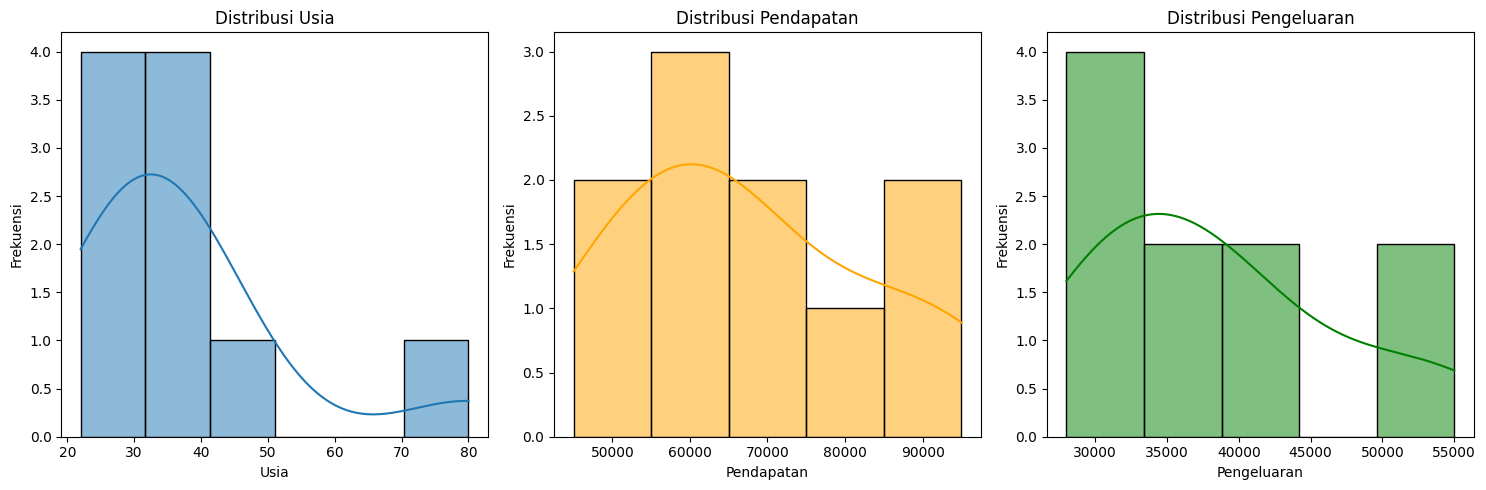

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data simulasi
df = pd.DataFrame({
    'Usia': [25, 30, 35, 28, 40, 22, 32, 80, 38, 45],  # 80 adalah outlier
    'Pendapatan': [50000, 60000, 65000, 55000, 90000, 45000, 70000, 62000, 80000, 95000],
    'Pengeluaran': [30000, 35000, 40000, 32000, 50000, 28000, 38000, 33000, 42000, 55000]
})

# Plot distribusi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Usia'], kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
sns.histplot(df['Pendapatan'], kde=True, color='orange')
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
sns.histplot(df['Pengeluaran'], kde=True, color='green')
plt.title('Distribusi Pengeluaran')
plt.xlabel('Pengeluaran')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


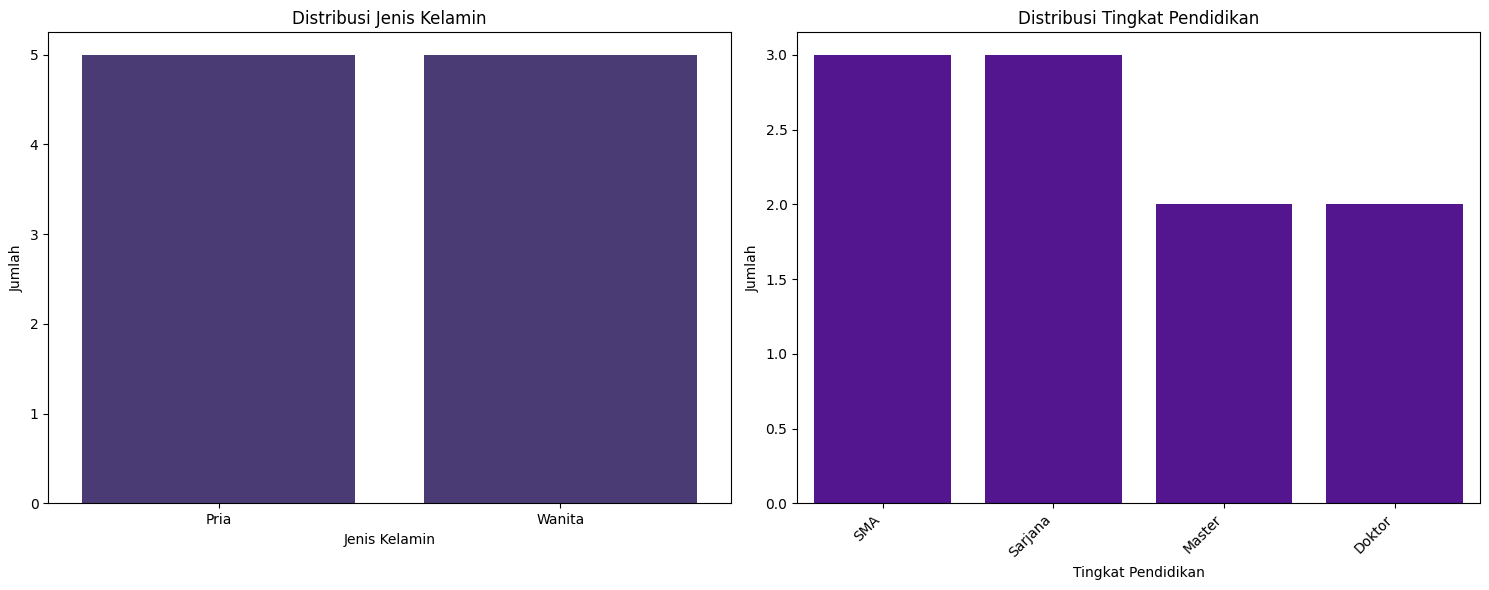

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data simulasi
df = pd.DataFrame({
    'Jenis Kelamin': ['Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Pria', 'Wanita', 'Wanita', 'Pria', 'Wanita'],
    'Pendidikan': ['SMA', 'Sarjana', 'Sarjana', 'Master', 'Doktor', 'SMA', 'Sarjana', 'Master', 'SMA', 'Doktor']
})

plt.figure(figsize=(15, 6))

# Plot 1: Jenis Kelamin
plt.subplot(1, 2, 1)
sns.countplot(x='Jenis Kelamin', data=df, color=sns.color_palette('viridis')[0])
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

# Plot 2: Pendidikan
plt.subplot(1, 2, 2)
sns.countplot(x='Pendidikan', data=df, order=df['Pendidikan'].value_counts().index,
              color=sns.color_palette('plasma')[0])
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


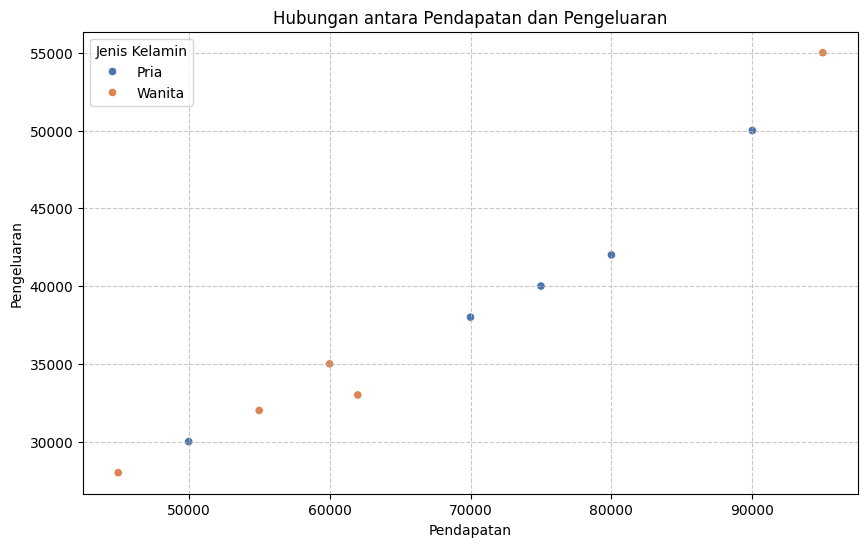

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat data simulasi
df = pd.DataFrame({
    'Pendapatan': [50000, 60000, 75000, 55000, 90000, 45000, 70000, 62000, 80000, 95000],
    'Pengeluaran': [30000, 35000, 40000, 32000, 50000, 28000, 38000, 33000, 42000, 55000],
    'Jenis Kelamin': ['Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita']
})

# Visualisasi hubungan Pendapatan vs Pengeluaran
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pendapatan', y='Pengeluaran', data=df, hue='Jenis Kelamin', palette='deep')
plt.title('Hubungan antara Pendapatan dan Pengeluaran')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


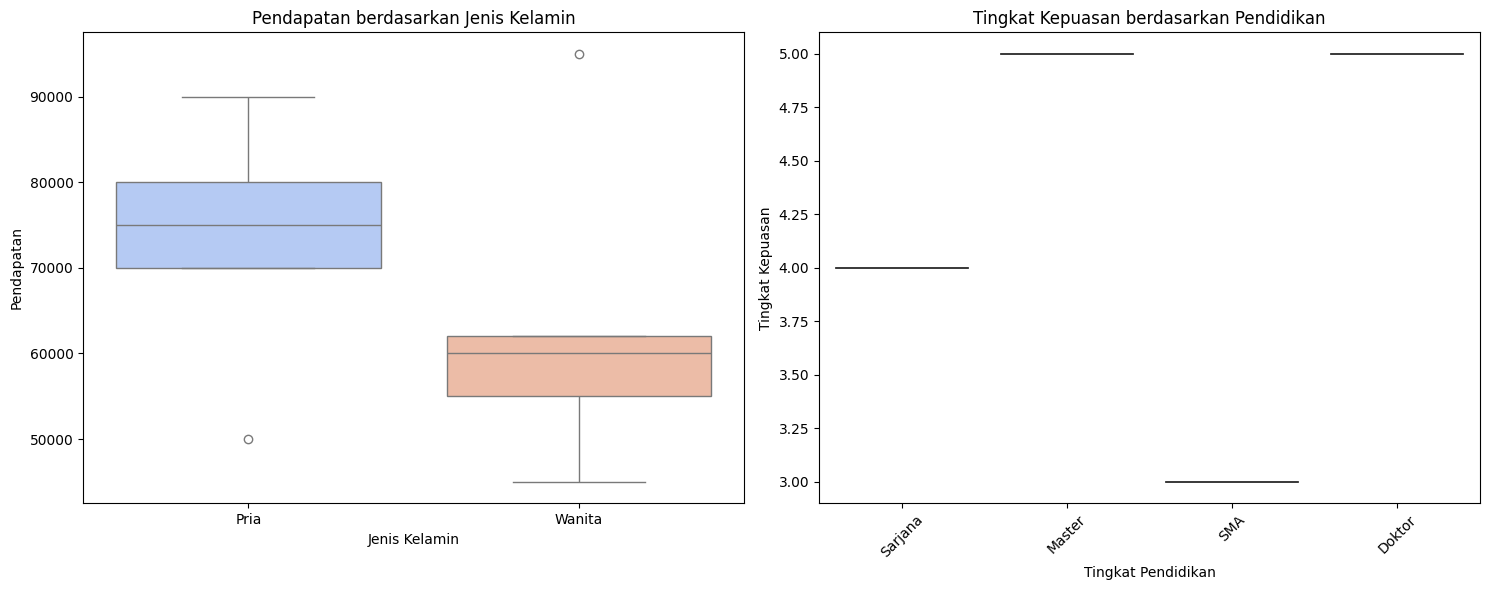

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data simulasi
df = pd.DataFrame({
    'Pendapatan': [50000, 60000, 75000, 55000, 90000, 45000, 70000, 62000, 80000, 95000],
    'Tingkat Kepuasan': [4, 5, 4, 3, 5, 4, 5, 3, 4, 5],
    'Jenis Kelamin': ['Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita', 'Pria', 'Wanita'],
    'Pendidikan': ['Sarjana', 'Master', 'Sarjana', 'SMA', 'Doktor', 'Sarjana', 'Master', 'SMA', 'Sarjana', 'Doktor']
})

plt.figure(figsize=(15, 6))

# Boxplot: Pendapatan berdasarkan Jenis Kelamin
plt.subplot(1, 2, 1)
sns.boxplot(x='Jenis Kelamin', y='Pendapatan', data=df,
            hue='Jenis Kelamin', palette='coolwarm', dodge=False, legend=False)
plt.title('Pendapatan berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Pendapatan')

# Violinplot: Tingkat Kepuasan berdasarkan Pendidikan
plt.subplot(1, 2, 2)
sns.violinplot(x='Pendidikan', y='Tingkat Kepuasan', data=df,
               hue='Pendidikan', palette='rocket', dodge=False, legend=False)
plt.title('Tingkat Kepuasan berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Tingkat Kepuasan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

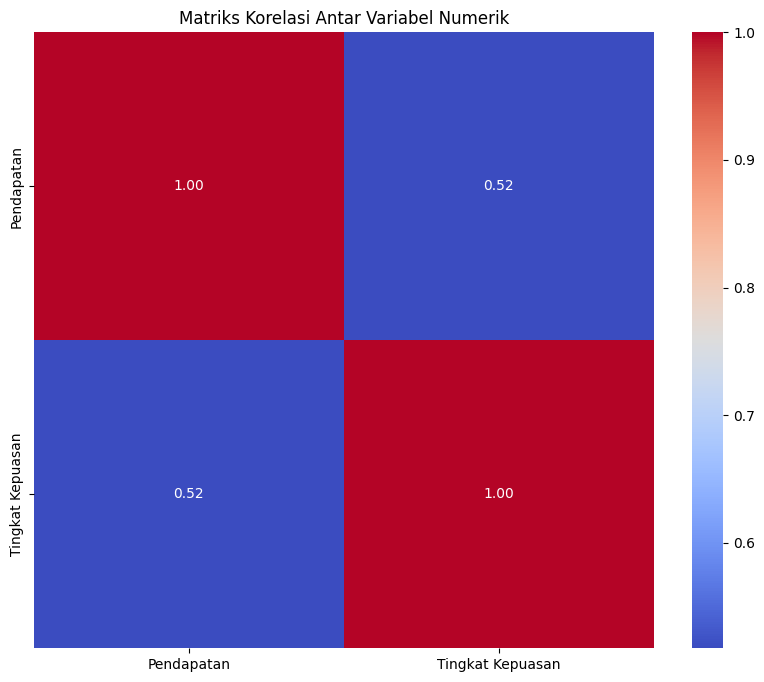

In [30]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

Kolom yang tersedia: ['Pendapatan', 'Tingkat Kepuasan', 'Jenis Kelamin', 'Pendidikan', 'Tanggal Bergabung', 'TahunBulan', 'Pengeluaran']


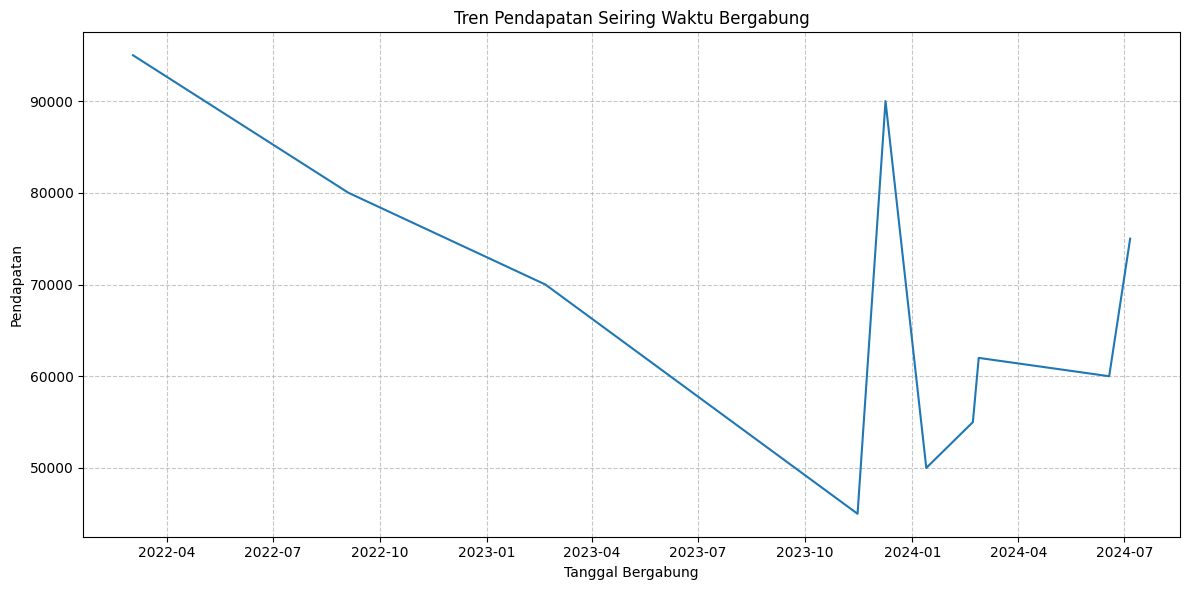

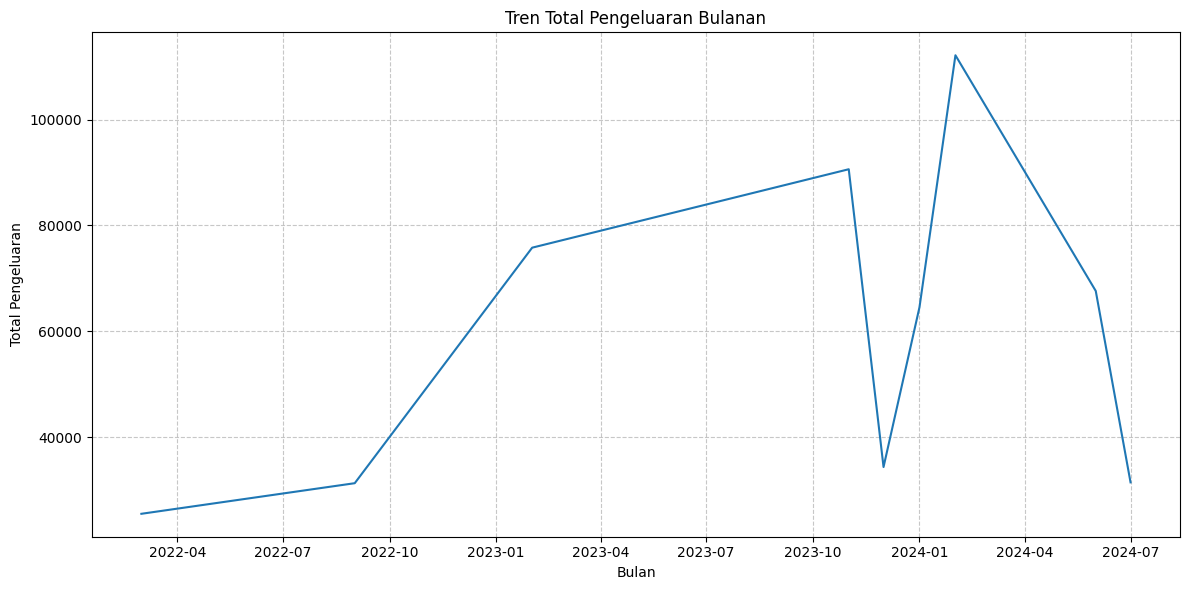

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Contoh data awal (jika belum ada DataFrame df)
# df = pd.read_csv('namafile.csv')  # jika data dari file
# Kalau sudah punya df, lanjut saja

# Cek kolom yang tersedia
print("Kolom yang tersedia:", df.columns.tolist())

# Tambah kolom 'Tanggal Bergabung' jika belum ada
if 'Tanggal Bergabung' not in df.columns:
    print("⚠️ Kolom 'Tanggal Bergabung' tidak ditemukan. Menambahkan kolom simulasi untuk keperluan visualisasi.")
    # Simulasi tanggal bergabung antara 2022 sampai 2024
    df['Tanggal Bergabung'] = pd.to_datetime(
        np.random.choice(pd.date_range(start='2022-01-01', end='2024-12-31'), size=len(df))
    )

# Pastikan format datetime
df['Tanggal Bergabung'] = pd.to_datetime(df['Tanggal Bergabung'], errors='coerce')

# Tambah kolom 'Pengeluaran' jika belum ada
if 'Pengeluaran' not in df.columns:
    print("⚠️ Kolom 'Pengeluaran' tidak ditemukan. Menambahkan nilai simulasi.")
    # Simulasi nilai pengeluaran
    df['Pengeluaran'] = np.random.randint(20000, 150000, size=len(df))

# Sort berdasarkan tanggal
df_sorted = df.sort_values('Tanggal Bergabung')

# Visualisasi 1: Tren Pendapatan Seiring Waktu Bergabung
plt.figure(figsize=(12, 6))
sns.lineplot(x='Tanggal Bergabung', y='Pendapatan', data=df_sorted)
plt.title('Tren Pendapatan Seiring Waktu Bergabung')
plt.xlabel('Tanggal Bergabung')
plt.ylabel('Pendapatan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tambahkan kolom 'TahunBulan' untuk agregasi bulanan
df['TahunBulan'] = df['Tanggal Bergabung'].dt.to_period('M')

# Agregasi pengeluaran per bulan
df_monthly = df.groupby('TahunBulan')['Pengeluaran'].sum().reset_index()
df_monthly['TahunBulan'] = df_monthly['TahunBulan'].dt.to_timestamp()

# Visualisasi 2: Tren Pengeluaran Bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x='TahunBulan', y='Pengeluaran', data=df_monthly)
plt.title('Tren Total Pengeluaran Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Pengeluaran')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
import os

# 1. Tentukan path file Excel asli dan lokasi output
input_path = r'D:\Project Data Cleaning & EDA\data\online_retail_II.xlsx'
output_path = r'D:\Project Data Cleaning & EDA\data\cleaned_customer_data.csv'

# 2. Baca dataset dari file Excel
try:
    df = pd.read_excel(input_path)
    print("✅ File berhasil dibaca!")
except FileNotFoundError:
    print(f"❌ File tidak ditemukan di lokasi: {input_path}")

# 3. (Opsional) Bersihkan data
# Contoh: Hapus baris kosong
# df.dropna(inplace=True)

# 4. Simpan dataset bersih ke CSV
try:
    df.to_csv(output_path, index=False)
    print(f"✅ Dataset bersih berhasil disimpan ke: {output_path}")
except Exception as e:
    print(f"❌ Gagal menyimpan file: {e}")

✅ File berhasil dibaca!
✅ Dataset bersih berhasil disimpan ke: D:\Project Data Cleaning & EDA\data\cleaned_customer_data.csv
